# Exercise 9: Creating a Bar Plot and Calculating the Mean Price Distribution

In this exercise, we'll learn how to create a table using the **pandas crosstab** function. We'll use a table to generate a bar plot. We'll then explore a bar plot generated using the **seaborn** library and calculate the mean price distribution. To do so, let's go through the following steps:


In [11]:
# Import the necessary modules and dataset:
import seaborn as sns
import pandas as pd

In [12]:
# Import the diamonds dataset from seaborn:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
# The feature cut is categorical. Print the unique values of the cut column
diamonds.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

**unique()** returns an array. There are five unique **cut** qualities and eight unique values in **clarity**. The number of unique values can be obtained using **nunique()** in pandas.

In [14]:
# Print the unique values of the clarity column:
diamonds.clarity.unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [15]:
# To obtain the counts of diamonds of each cut quality, we first create a table using 
# the pandas crosstab() function:
cut_count_table = pd.crosstab(index=diamonds['cut'],columns='count')
cut_count_table

col_0,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


<Axes: xlabel='cut'>

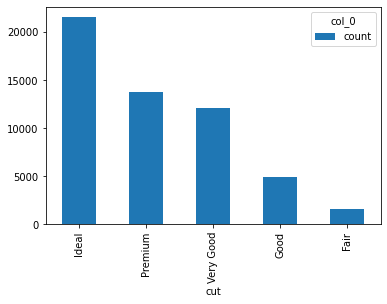

In [16]:
# Pass these counts to another pandas function, plot(kind='bar')
cut_count_table.plot(kind='bar')

We see that most of the diamonds in the dataset are of the **Ideal** cut quality, followed by **Premium**, **Very Good**, **Good**, and **Fair**. Now, let's see how to generate the same plot using seaborn.

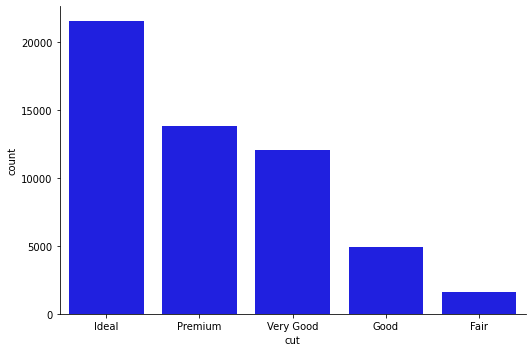

In [18]:
# Generate the same bar plot using seaborn:
sns.catplot(data = diamonds, x="cut", aspect=1.5, kind="count", color="b")

Notice how the **catplot()** function does not require us to create the 
intermediate count table (using **pd.crosstab()**), and reduces one step in the plotting process.

Next, here is how we obtain the mean price distribution of different cut qualities using **seaborn**:

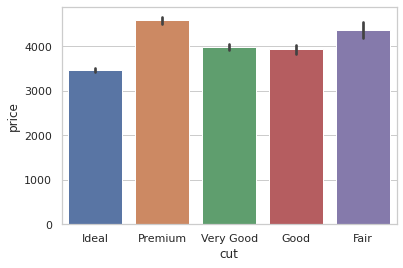

In [23]:
# Bar plot with the mean price distribution

from numpy import median, mean

sns.set(style="whitegrid")
ax = sns.barplot(x="cut", y="price", data=diamonds, estimator=mean)

Here, the black lines (error bars) on the rectangles indicate the uncertainty (or spread of values) around the mean estimate. By default, this value is set to **95%** confidence. 

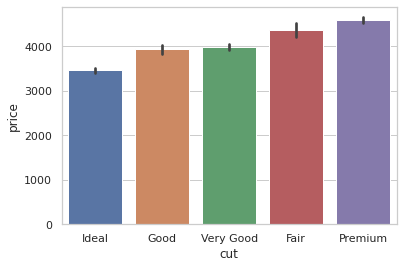

In [25]:
# Reorder the x axis bars using order:
ax = sns.barplot(x="cut", y="price", data=diamonds, estimator=mean, 
                 order=['Ideal','Good','Very Good','Fair','Premium'])


Grouped bar plots can be very useful for visualizing the variation of a particular feature within different groups. 